In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv("titanic.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.drop(["Name"],axis=1,inplace=True)

In [12]:
df.drop(["Ticket"],axis=1,inplace=True)
df.drop(["Cabin"],axis=1,inplace=True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [15]:
df.drop(["SibSp"],axis=1,inplace=True)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,1,0,3,male,22.0,0,7.2500,S
1,2,1,1,female,38.0,0,71.2833,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,0,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S


In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [20]:
cl=df.columns
cl=['PassengerId', 'Pclass', 'Sex', 'Age', 'Parch','Fare', 'Embarked', 'Survived']
df=df[cl]
df

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,0,7.2500,S,0
1,2,1,female,38.0,0,71.2833,C,1
2,3,3,female,26.0,0,7.9250,S,1
3,4,1,female,35.0,0,53.1000,S,1
4,5,3,male,35.0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,13.0000,S,0
887,888,1,female,19.0,0,30.0000,S,1
888,889,3,female,NaN,2,23.4500,S,0
889,890,1,male,26.0,0,30.0000,C,1


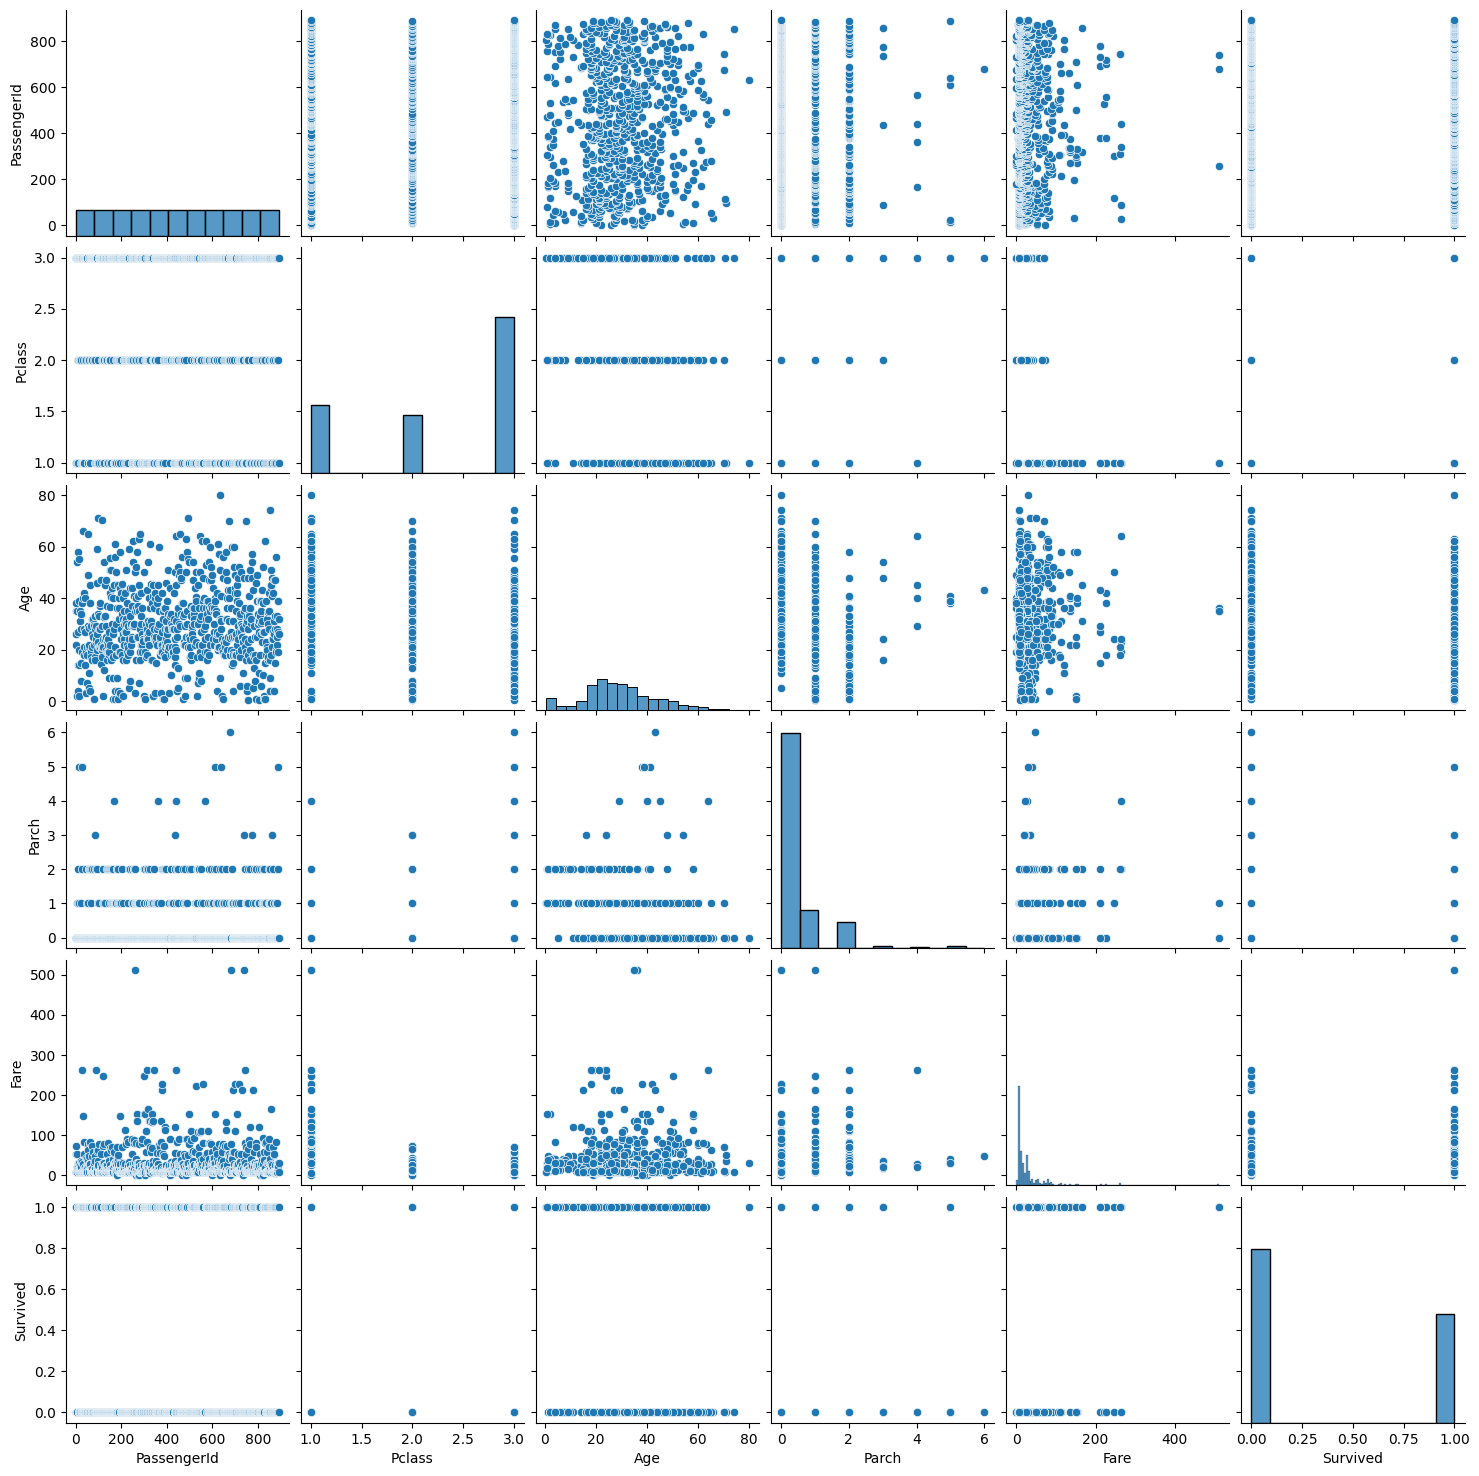

In [21]:
sns.pairplot(df)

<Axes: ylabel='Fare'>

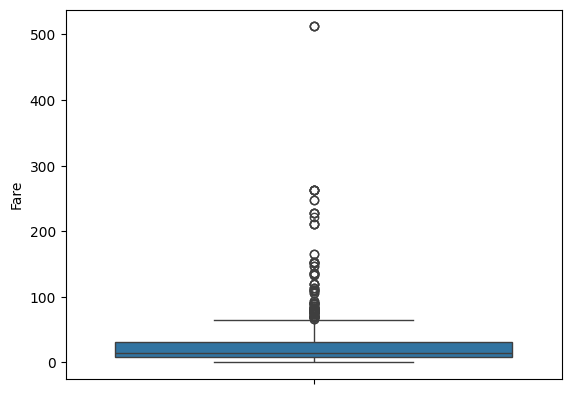

In [23]:
sns.boxplot(df["Fare"])

In [ ]:
df.info()

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

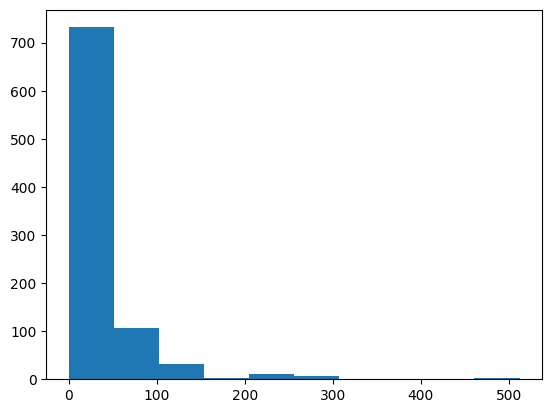

In [24]:
plt.hist(df["Fare"])

In [25]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [27]:
df.dropna(subset=["PassengerId"],inplace=True)

In [28]:
lim=df["Fare"].quantile(0.75)-df["Fare"].quantile(0.25)
ul=df["Fare"].quantile(0.75) +3*lim
ll=df["Fare"].quantile(0.25) -3*lim

In [29]:
ul

np.float64(100.2688)

In [30]:
ll

np.float64(-61.358399999999996)

In [31]:
out=df[(df["Fare"]>ul)|(df["Fare"]<ll)]
out

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked,Survived
27,28,1,male,19.00,2,263.0000,S,0
31,32,1,female,28.00,0,146.5208,C,1
88,89,1,female,23.00,2,263.0000,S,1
118,119,1,male,24.00,1,247.5208,C,0
195,196,1,female,58.00,0,146.5208,C,1
215,216,1,female,31.00,0,113.2750,C,1
258,259,1,female,35.00,0,512.3292,C,1
268,269,1,female,58.00,1,153.4625,S,1
269,270,1,female,35.00,0,135.6333,S,1
297,298,1,female,2.00,2,151.5500,S,0


In [33]:
for i in out.index:
    df["Fare"].fillna(df["Fare"].mean(),inplace=True)

C:\Users\vinee\AppData\Local\Temp\ipykernel_20536\3415618945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df["Fare"].mean(),inplace=True)


In [ ]:
df.head()

In [ ]:
sns.barplot(df["Sex "],df["Survived "])

In [ ]:
df=pd.get_dummies(df,drop_first=True)
df

In [ ]:
cl=df.columns
cl

In [ ]:
cl=df.columns
cl=['PassengerId ', 'Pclass ', 'Age ', 'Parch ', 'Fare ','Sex _male ', 'Embarked _Q ', 'Embarked _S ', 'Survived ']
df=df[cl]
df

In [ ]:
df.info()

In [ ]:
x=df.iloc[:,0:8].values
x

In [ ]:
y=df.iloc[:,-1].values
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
prd=lr.predict(x_test)

In [ ]:
prd

In [ ]:
y_test

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(y_test,prd)

In [ ]:
metrics.accuracy_score(y_test,prd)

In [ ]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler()

In [ ]:
x_train=x.fit_transform(x_train)
x_train 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=50)

In [ ]:
knn.fit(x_train,y_train)

In [ ]:
pr=knn.predict(x_test)
pr

In [ ]:
metrics.accuracy_score(y_test,pr)